<a href="https://colab.research.google.com/github/Subhash-269/Subhash-269/blob/main/BT_Transfer_learning_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
cd /content/drive/MyDrive/transfer_learning_yolov4

/content/drive/MyDrive/transfer_learning_yolov4


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 15412 (delta 1), reused 2 (delta 0), pack-reused 15404
Receiving objects: 100% (15412/15412), 14.06 MiB | 5.91 MiB/s, done.
Resolving deltas: 100% (10351/10351), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
!mkdir training

In [3]:
#upload dataset
from google.colab import files
import zipfile

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format
        (name = fn,length = len(uploaded[fn])))

Saving transfer_learning_images.zip to transfer_learning_images.zip
User uploaded file "transfer_learning_images.zip" with length 4807294 bytes


In [4]:
# ** Make changes in the `makefile` to enable OPENCV and GPU**
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/MyDrive/transfer_learning_yolov4/darknet


In [5]:
# build darknet 
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [6]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg


/content/drive/MyDrive/transfer_learning_yolov4/darknet/data
/content/drive/MyDrive/transfer_learning_yolov4/darknet


In [7]:
# Unzip the BT.zip dataset and its contents so that they are now in /darknet/data/ folder 

!unzip /content/drive/MyDrive/transfer_learning_yolov4/transfer_learning_images.zip -d data/

Archive:  /content/drive/MyDrive/transfer_learning_yolov4/transfer_learning_images.zip
   creating: data/transfer_learning_images/
  inflating: data/transfer_learning_images/00000_102_jpg.rf.480b43f4ebf5e2f1afab3a766f36b413.jpg  
  inflating: data/transfer_learning_images/00000_102_jpg.rf.480b43f4ebf5e2f1afab3a766f36b413.txt  
  inflating: data/transfer_learning_images/00000_121_jpg.rf.3f779d2f71eff5b7255ae6e480fd075a.jpg  
  inflating: data/transfer_learning_images/00000_121_jpg.rf.3f779d2f71eff5b7255ae6e480fd075a.txt  
  inflating: data/transfer_learning_images/00000_140_jpg.rf.f5d80a74204eedf3941384488ce79c37.jpg  
  inflating: data/transfer_learning_images/00000_140_jpg.rf.f5d80a74204eedf3941384488ce79c37.txt  
  inflating: data/transfer_learning_images/00000_159_jpg.rf.aff9489f311f68c4f2411ca0633f98a0.jpg  
  inflating: data/transfer_learning_images/00000_159_jpg.rf.aff9489f311f68c4f2411ca0633f98a0.txt  
  inflating: data/transfer_learning_images/00002_110_jpg.rf.273e6114c8d18b656

In [8]:
# Copy the yolov4-custom.cfg file so that it is now in /darknet/cfg/ folder 

!cp /content/drive/MyDrive/transfer_learning_yolov4/yolov4-custom-train.cfg  cfg

# verify if your custom file is in cfg folder
!ls cfg/

yolov4-custom-train.cfg


In [10]:
# Copy the obj.names and obj.data files from your drive so that they are now in /darknet/data/ folder 

!cp /content/drive/MyDrive/transfer_learning_yolov4/obj.data data
!cp /content/drive/MyDrive/transfer_learning_yolov4/obj.names  data

# verify if the above files are in data folder
!ls data/

labels	obj.data  obj.names  transfer_learning_images


In [11]:
pwd

'/content/drive/MyDrive/transfer_learning_yolov4/darknet'

In [12]:
# Copy the process.py file to the current darknet directory 

!cp /content/drive/MyDrive/transfer_learning_yolov4/process.py .

In [14]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

/content/drive/MyDrive/transfer_learning_yolov4/darknet
labels	obj.data  obj.names  test.txt  train.txt  transfer_learning_images


In [15]:
cd /content/drive/MyDrive/transfer_learning_yolov4/darknet

/content/drive/MyDrive/transfer_learning_yolov4/darknet


In [16]:
# Copy the pre-trained weights file to the current darknet directory 

!cp /content/drive/MyDrive/yolov4/training/yolov4-custom-train_best.weights .

In [17]:
pwd

'/content/drive/MyDrive/transfer_learning_yolov4/darknet'

In [18]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-custom-train.cfg yolov4-bt-best.weights -dont_show -map


Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.931113), count: 2, class_loss = 0.035453, iou_loss = 0.745198, total_loss = 0.780650 
 total_bbox = 550613, rewritten_bbox = 0.000182 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.878868), count: 6, class_loss = 1.017322, iou_loss = 37.747097, total_loss = 38.764420 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.790477), count: 12, class_loss = 2.504362, iou_loss = 24.257053, total_loss = 26.761415 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.860272), count: 2, class_loss = 0.965453, iou_loss = 0.650147, total_loss = 1.615600 
 total_bbox = 550633, rewritten_bbox = 0.000182 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.818833), count: 8, class_loss = 1.417664, iou_loss = 49.167957, total_loss = 50.585

In [19]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

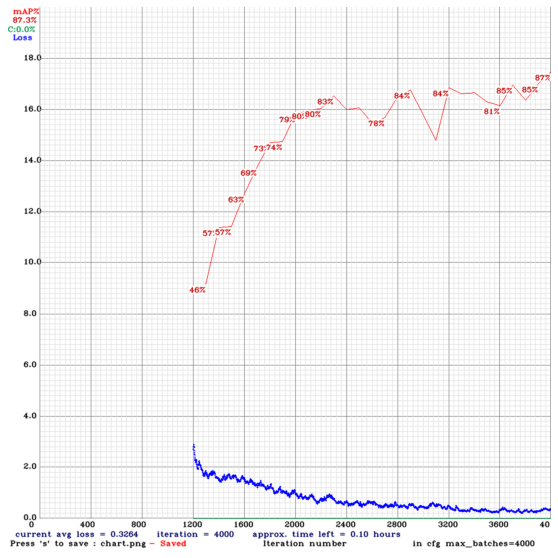

In [20]:
#only works if the training does not get interrupted
imShow('chart.png')

In [ ]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/obj.data cfg/yolov4-custom-train.cfg yolov4-bt-best.weights -dont_show -map


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

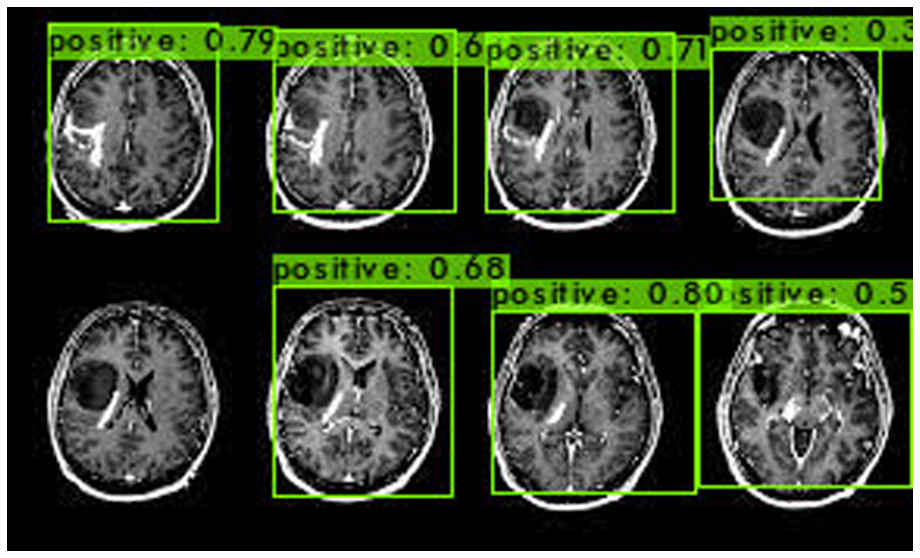

In [21]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom-train.cfg /content/drive/MyDrive/yolov4/training/yolov4-custom-train_best.weights /content/drive/MyDrive/transfer_learning_yolov4/test/download.jfif -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

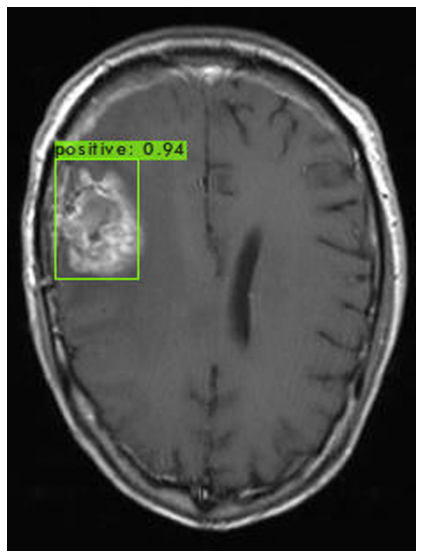

In [22]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom-train.cfg /content/drive/MyDrive/yolov4/training/yolov4-custom-train_best.weights /content/drive/MyDrive/transfer_learning_yolov4/test/y701.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

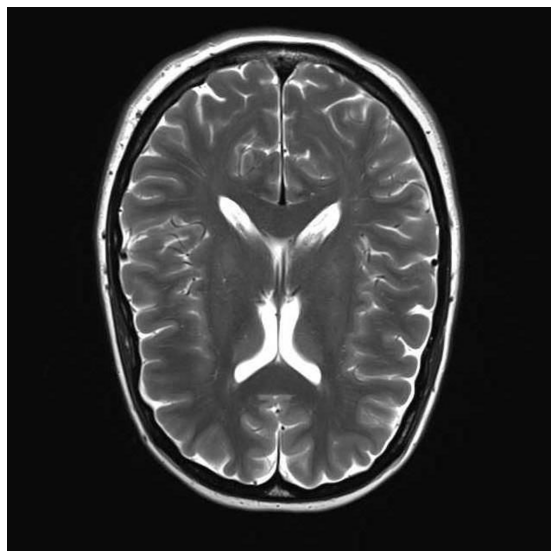

In [23]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom-train.cfg /content/drive/MyDrive/yolov4/training/yolov4-custom-train_best.weights /content/drive/MyDrive/transfer_learning_yolov4/test/No12.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

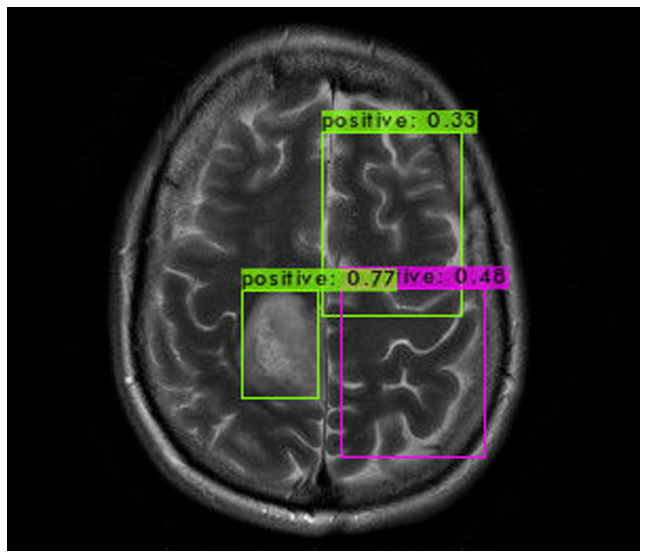

In [24]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom-train.cfg /content/drive/MyDrive/yolov4/training/yolov4-custom-train_best.weights /content/drive/MyDrive/transfer_learning_yolov4/test/BTSS-2016-Ed-1-Benign-Brain-Tumours-Fig-1-300x258.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

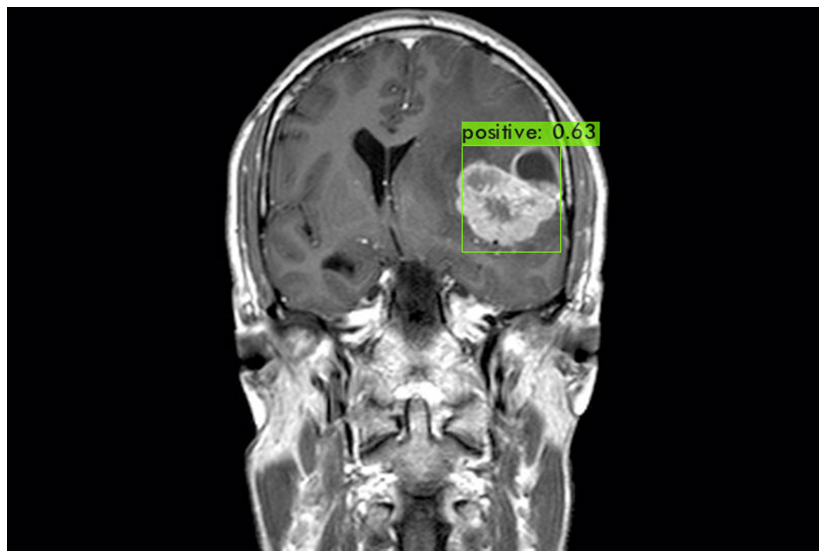

In [25]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom-train.cfg /content/drive/MyDrive/yolov4/training/yolov4-custom-train_best.weights /content/drive/MyDrive/transfer_learning_yolov4/test/brain1-20140731113300522.jpg -thresh 0.3 
imShow('predictions.jpg')